get velocity profile at specific location and plot it

In [34]:
#change working directory
path = 'd:\post\Project\Fixed_Turbine'
os.chdir(path)


In [35]:
#import necessary modules
import sys
import numpy as np
import tecplot_io as tec
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

In [36]:
#Declare necessary functions
def find_index(_z, _limits):
	_n = len(_z)
	_i_min = 0
	_i_max = _n - 1
	_limits2 = np.zeros(2)

	if isinstance(_limits, float):
		_limits2[0:2] = _limits
	else:
		_limits2 = _limits
		 			
	for i in range(_n):
		if _z[i]<_limits2[0] and i>_i_min :
			_i_min = i
		if _z[i]>_limits2[1] and i<_i_max :
			_i_max = i
	#print('zlimits='+str(_limits))
	#print('i_min='+str(_i_min)+', i_max='+str(_i_max))

	if isinstance(_limits, float):
		return _i_min
	else:
		return _i_min, _i_max

def get_coord_range (_loc, _D):
	_xc = _loc[0]
	_yc = _loc[1]
	_xran = [_xc+0.2*_D, _xc+23.0*_D]
	_yran = [_yc-2.0*_D, _yc+2.0*_D]
	return _xran, _yran

def get_index_range (_x, _y, _xran, _yran):
#	print "range for x="+str(_x)+" is "+str(_xran)
#	print "range for y="+str(_y)+" is "+str(_yran)
	_ixmin, _ixmax = find_index(_x, _xran)
	_iymin, _iymax = find_index(_y, _yran)
	_ixran = [_ixmin, _ixmax]
	_iyran = [_iymin, _iymax]
	return _ixran, _iyran

def identify_wake_core(_ixran, _iyran, _h, _x1, _y1, width=20, _method=1, _hw=1):
	_ix = []
	_iy = []
	_x = []
	_y = []
	#print("ixran="+str(_ixran)+", iyran="+str(_iyran)+", iyran[0]="+str(_iyran[0]))
	
	_tempwidth = (_iyran[1] - _iyran[0])/3
	_tempstart = _iyran[0] + (_iyran[1] - _iyran[0])/2 - _tempwidth/2	
	_tempend = _tempstart + _tempwidth
	
	_utmp = np.zeros(_h.shape[1])

def smooth(x,window_len=11,window='hanning'):
    if x.ndim != 1:
        raise ValueError('smooth only accepts 1 dimension arrays.')

    if x.size < window_len:
        raise ValueError('Input vector needs to be bigger than window size.')


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]  #np.r_ : .. ... (row ...)
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')    #np.hanning(11) ... .... .. . .... w. ..... --- hanning window : pyhon .. window.

    y=np.convolve(w/w.sum(),s,mode='valid')
    #print(len(y))
    #print(len(w))
    #return y
    
    _start = len(w)/2
    return y[(_start):(_start+len(x))]

In [37]:
#necessary variables
r = 40.0
D = 2.0*r
nx = 192
ny = 192
nz = 64
nvar = 6
nturbine = 16
dt = 0.68543297937
tis = 200
tie = 15000
tii = 200
nti = int((tie - tis) / tii + 1)
tii = 200
U_hub = 8.0
#frequency of wave
omega = 0.0498561155567
#wave period
T = 2*np.pi/omega
#turbine hub height
H_hub = 70.0
#Rotational angular period
T_turb = 42.84
U_star = 0.356
H_hub = 70
#Mean finite velocity
U_m = 11.5258407161

In [38]:
turbinefile = "Turbine.inp"
turbinedata = np.genfromtxt(turbinefile, skip_header = 1)
turbineloc = turbinedata[3:5] #single turbine
nturbine = len(turbineloc[:,0]) #multiple turbines

for iturb in range(nturbine):
	xtmp, ytmp = get_coord_range(turbineloc[:],D)

allmins = []
for iturb in range(nturbine):
	allmins.append(list())

In [39]:
foldername =  "./POST_UI_2D1_0001/"
outputfolder = 'post_result/'
#create output folder named 'post_result' 
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)
print("Current working directory: {0}".format(os.getcwd()))
#f = open( outputfolder + "wake_spectrum.dat",'w')
#f1 = open( outputfolder + "wake_line.dat",'w')

Current working directory: d:\post\Project\Fixed_Turbine


In [40]:
U_mean = np.zeros((nz,ny))
W_mean = np.zeros((nz,ny))

In [41]:
#clean data
#calculate mean velocity
for it in range(nti):
	ti = tis + tii * it
	filename = foldername + "POST_UI_2D1_" + "{:010d}".format(ti) + "_0001.DAT"
	data0 = tec.tecplot_reader(filename, [nz, ny, nvar], 2)
	data0 = data0.reshape([nz,ny,nvar])
	X = data0[:,:,0]
	Y = data0[:,:,1]
	Z = data0[:,:,2]
	U = data0[:,:,3]
	V = data0[:,:,4]
	W = data0[:,:,5]
#mean velocity
	#U_mean = np.mean(U, axis=1)
	Z = np.mean(Z, axis=1)
	U_mean = U_mean + U
	W_mean = W_mean + W
#time average velocity
U_mean = U_mean / nti
W_mean = W_mean / nti
#U_mean_all = np.mean(U_mean, axis=1)
#get central cross section
U_mean_all = U_mean[:,96]
W_mean_all = W_mean[:,96]
#checked
#print(U_mean)
print (W_mean_all)
#print(U[1,:])
#print(Z)

[ 2.41168887e-03  3.43561783e-03  5.93847365e-03  8.65405616e-03
  1.09418891e-02  1.29085907e-02  1.44389777e-02  1.54623662e-02
  1.62701622e-02  1.70612751e-02  1.78387979e-02  1.86027728e-02
  1.93407700e-02  2.00228339e-02  2.06162517e-02  2.11048854e-02
  2.14908201e-02  2.17871349e-02  2.20245651e-02  2.22341820e-02
  2.24135536e-02  2.25154600e-02  2.24752100e-02  2.22951954e-02
  2.20356881e-02  2.17488264e-02  2.14529012e-02  2.11310963e-02
  2.07855809e-02  2.04704901e-02  2.02543553e-02  2.01458015e-02
  2.00723787e-02  1.99307077e-02  1.96496285e-02  1.92388256e-02
  1.86066149e-02  1.81352847e-02  1.63617604e-02  1.32603318e-02
  1.15142344e-02  1.09240316e-02  1.06024002e-02  9.00672444e-03
  6.66862498e-03  4.85863147e-03  3.49933993e-03  2.53229046e-03
  8.85474309e-04 -6.88928186e-04 -1.70724611e-03 -1.85376860e-03
 -1.04202767e-03  2.65756096e-05  3.10033427e-04 -2.81615080e-06
 -2.38631401e-05  3.39787243e-04  7.09175045e-04  9.56222893e-04
  1.36004461e-03  1.34245

In [42]:
data1 = np.zeros((nz,2))
data1[:,0] = U_mean_all*(U_m/U_hub)
data1[:,1] = Z/D


In [43]:
f0 = open( outputfolder + "Vertical profile time-average velocity2.plt",'w')
f0.write("VARIABLES = u/U_hub, z/D  \n")
np.savetxt(f0, data1)
f0.close()

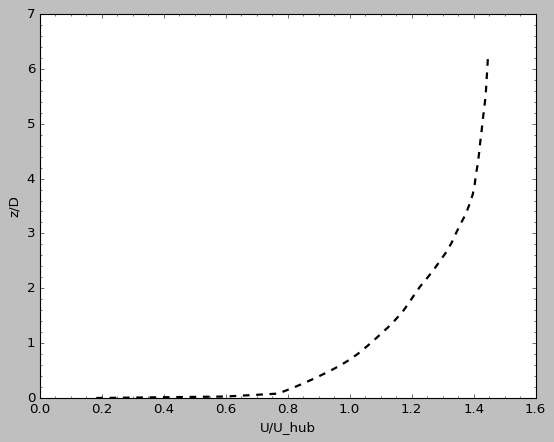

In [44]:
plt.style.use('classic')
fig, ax = plt.subplots()
plt.plot(data1[:,0], data1[:,1])
plt.gca().get_lines()[0].set_color("black")
plt.gca().get_lines()[0].set_linestyle("--")
plt.gca().get_lines()[0].set_linewidth(2)
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
plt.xlabel('U/U_hub')
plt.ylabel('z/D')
plt.show()

In [45]:
#calculate fluctuating component
U_prime_square = np.zeros((nz))
for it in range(nti):
	ti = tis + tii * it
	filename = foldername + "POST_UI_2D1_" + "{:010d}".format(ti) + "_0001.DAT"
	data2 = tec.tecplot_reader(filename, [nz, ny, nvar], 2)
	data2 = data2.reshape([nz,ny,nvar])
	X = data2[:,:,0]
	Y = data2[:,:,1]
	Z = data2[:,:,2]
	U = data2[:,:,3]
	V = data2[:,:,4]
	W = data2[:,:,5]
	U = U[:,96]
	W = W[:,96]
	U_fluc = (U-U_mean_all)
	W_fluc = (W-W_mean_all)
	Reynolds_stress = - U_fluc*W_fluc
	Z = np.mean(Z, axis=1)
	U_prime_square = U_prime_square + U_fluc**2

Reynolds_stress_tm = Reynolds_stress / nti
print(Reynolds_stress_tm)	

[-8.42488809e-05 -5.59741207e-05 -1.06823684e-05  8.68062530e-07
  4.60894036e-06  5.67848755e-06  6.14827506e-06  6.70678448e-06
  7.36737437e-06  8.22885913e-06  9.27841495e-06  1.05418735e-05
  1.21002654e-05  1.40536786e-05  1.64508310e-05  1.92589596e-05
  2.22889726e-05  2.51699852e-05  2.73374584e-05  2.83959633e-05
  2.80222935e-05  2.57343094e-05  2.24031475e-05  1.88329360e-05
  1.55357615e-05  1.30207566e-05  1.07581023e-05  7.68728465e-06
  2.98036994e-06 -3.71610476e-06 -1.26495139e-05 -2.34936259e-05
 -3.41755257e-05 -4.17851803e-05 -4.52856628e-05 -4.55951895e-05
 -4.28731413e-05 -2.97428413e-05 -9.07389466e-06 -3.46793703e-06
 -9.12842836e-06 -9.27202520e-06 -6.68403941e-06 -2.57522365e-06
 -9.59279481e-07 -2.63603016e-07  1.39218408e-06  1.61902643e-06
 -6.98674093e-07 -5.12087334e-07 -2.40333671e-08 -3.78026471e-08
 -2.57253591e-07 -7.48614379e-07 -8.07698015e-07 -1.13066609e-08
 -3.16164411e-07 -9.59204155e-08  2.56568227e-07  5.33772125e-07
  6.75735704e-07  1.66643

In [46]:
U_prime_rms = np.sqrt(U_prime_square / nti)
print(U_prime_rms)
#print(U_prime_square)
#print(U_prime_square[58])
#print(U[58])
#print(U_mean_all[58])
#test = (U[58] - U_mean_all[58])**2
#test = (U - U_mean_all)**2
#print(test)

[0.10808127 0.13460945 0.05040397 0.05320435 0.05660315 0.06077616
 0.06555587 0.06817454 0.0707712  0.07332745 0.07584205 0.07832532
 0.08075501 0.08308462 0.08528808 0.08739182 0.08941509 0.09136266
 0.09328026 0.09523107 0.09721446 0.09915268 0.10090826 0.10237791
 0.10329042 0.10357115 0.10323184 0.1023985  0.10124336 0.09998452
 0.09882569 0.0978656  0.09701071 0.09612348 0.09516792 0.0941903
 0.09319464 0.08842415 0.08801213 0.08669698 0.0809388  0.07157701
 0.05998578 0.0521216  0.0428498  0.03338441 0.02962028 0.0257109
 0.02104649 0.01949432 0.02041295 0.02096004 0.02124546 0.02085782
 0.0217403  0.01999202 0.01899728 0.02022972 0.02127488 0.01870084
 0.01893849 0.01567773 0.01347687 0.01347791]


In [47]:
data3 = np.zeros((nz,2))
data3[:,0] = U_prime_rms*(U_m/U_star)
data3[:,1] = Z/D

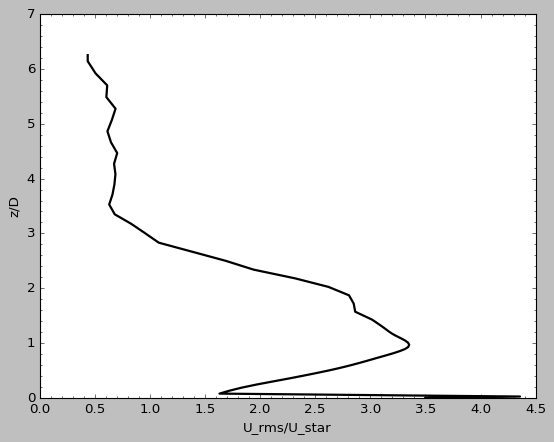

In [48]:
#show plot inline
%matplotlib inline
plt.style.use('classic')
fig, ax = plt.subplots()
plt.plot(data3[:,0], data3[:,1])
plt.gca().get_lines()[0].set_color("black")
plt.gca().get_lines()[0].set_linestyle("-")
plt.gca().get_lines()[0].set_linewidth(2)
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
plt.xlabel('U_rms/U_star')
plt.ylabel('z/D')
plt.show()

In [49]:
f1 = open( outputfolder + "test.plt",'w')
f1.write("VARIABLES = u_rms/U_hub, z/D  \n")
np.savetxt(f1, data3)
f1.close()

In [50]:
data4 = np.zeros((nz,2))
data4[:,0] = Reynolds_stress_tm/(U_star**2)
data4[:,1] = Z/D

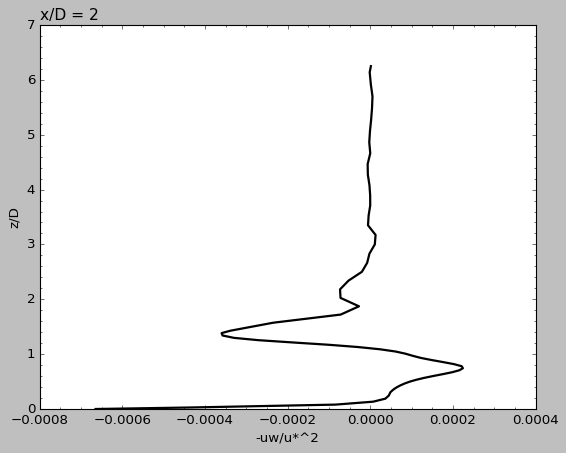

In [56]:
#show plot inline
%matplotlib inline
plt.style.use('classic')
fig, ax = plt.subplots()
plt.plot(data4[:,0], data4[:,1])
#customize plot title
plt.title('x/D = 2', fontsize=14, color='black', loc='left')
plt.gca().get_lines()[0].set_color("black")
plt.gca().get_lines()[0].set_linestyle("-")
plt.gca().get_lines()[0].set_linewidth(2)
ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
plt.xlabel('-uw/u*^2')
plt.ylabel('z/D')
plt.show()

In [51]:
f2 = open( outputfolder + "test1.plt",'w')
f2.write("VARIABLES = u_rms/U_hub, z/D  \n")
np.savetxt(f2, data4)
f2.close()